<a href="https://colab.research.google.com/github/FelipeToroR/MLP_Desafio3/blob/main/Matriz_desafio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Leer y guardar el dataset
!git clone https://github.com/OptativoPUCV/Handwritten-letter-dataset
!mkdir Datos-letras
!7z x "/content/Handwritten-letter-dataset/A_Z Handwritten Data.7z.001" -tsplit
!7z e "/content/A_Z Handwritten Data.7z"
data = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')

## **Se separan los datos en inputs(x) y labels(y) y luego se normalizan**

In [ ]:
x1 = data.drop('0',axis = 1)  # x serán los datos de ENTRADA
y1 = data['0']    # y representa el label o letra de SALIDA
y1= y1[:,np.newaxis]

# Normalizando datos
X = x1.astype('float32') # <--- Entrada
X /= 255

num_classes = 26  # <--- Salida
Y = to_categorical(y1, num_classes)

## **La función activación retorna el valor activado y valor derivado** 

In [5]:
def activation(x):
  return ((1/(1+np.e**(-x))) , (x * (1-x)))

## **Se crea la capa con su respectiva función de activación y sus pesos conectados con la capa anterior.**

In [6]:
class Capa():
  def __init__(self, n_conexiones: int, n_neuronas: int, activation):
    self.activation = activation
    self.W = np.random.rand(n_conexiones, n_neuronas) * 2 - 1

# **Creación de la red**
Se recibe la topología, es decir, un arreglo de capas la cual consiste en **[x, capas ocultas, y]** : <br> 

* x = neuronas de inputs
* capas ocultas = desde 1 a ∞+
* y = neuronas de outputs



In [7]:
def crear_red(topologia: list, activation):
  red = []
  for l, capa in enumerate(topologia[:-1]):
    red.append( Capa(topologia[l], topologia[l+1], activation) )
  return red

# **Forward Propagation**

In [8]:
def forward(red, X):
  out = [(None, X)]
  for l, capa in enumerate(red):
    z = out[-1][1] @ red[l].W # Multiplicación de matrices
    a = red[l].activation(z)[0] # La función de activación retorna el valor activado y el derivado, necesitamos el activado para el forward
    out.append((z, a)) # Guardamos todas las combinaciones para poder usar la misma función en el backpropagation
  return out

# **Calcular la predicción**

In [9]:
p = 784
topologia = [p, 120, 60, 30, 26]
red = crear_red(topologia, activation)
prediccion = forward(red, X)

# La predicción de todos los valores de entrada de X
print(prediccion[-1][1])

              0         1         2         3         4         5         6   \
0       0.254957  0.277402  0.626808  0.964041  0.556665  0.514168  0.983651   
1       0.282793  0.297569  0.665047  0.956701  0.616193  0.548061  0.988775   
2       0.334736  0.433646  0.662070  0.949912  0.578110  0.428026  0.984407   
3       0.328757  0.482728  0.772602  0.911359  0.609107  0.406074  0.978372   
4       0.343918  0.492971  0.622754  0.863274  0.834150  0.419501  0.984126   
...          ...       ...       ...       ...       ...       ...       ...   
372445  0.229241  0.223932  0.717334  0.942529  0.592996  0.367318  0.982946   
372446  0.261461  0.309983  0.684285  0.940311  0.698237  0.368835  0.981415   
372447  0.277588  0.147504  0.718491  0.951831  0.487192  0.331892  0.982312   
372448  0.293807  0.224778  0.687358  0.942163  0.710257  0.315325  0.992243   
372449  0.293807  0.224778  0.687358  0.942163  0.710257  0.315325  0.992243   

              7         8         9   .

# **Función de coste**

In [10]:
def coste(Ypred, Yesp):
  return (np.mean((Ypred - Yesp) ** 2), (Ypred - Yesp))

# **Modelo matemático**
En forma de algoritmo se utilizan las funciones de propagación 'forward' y 'backward' con el fin de propagar los resultados desde el input hasta el output y así sucesivamente. La clave estará en el descenso del gradiente, la cual nos dará los valores mínimos (coste de entrenamiento).

In [11]:
def train(red, X, Y, coste, learning_rate=0.001):
  # forward 
  out = forward(red, X)

  # backward pass
  delta = []
  #for i in range(len(red)-1, -1, -1): # recorrer hacie atrás del largo a 0
  for i in reversed(range(0,len(red))):
    z = out[i+1][0]
    a = out[i+1][1]
    if i == len(red)-1:
        #delta última capa
        delta.insert(0, coste(a, Y)[1] * red[i].activation(a)[1] ) # delta 0 = derivada del coste (osea Ypred - Yesp) * derivada de activación de la capa
    else:
        # delta respecto al anterior
        delta.insert(0, delta[0] @ aux_W.T * red[i].activation(a)[1]) # delta n = delta(n+1) x W(n+1).T * derivada de activación de la capa 
    aux_W = red[i].W
    # Descenso del gradiente
    red[i].W = red[i].W - out[i][1].T @ delta[0] * learning_rate # nuevoW[i] = actualW[i] - salida[i].T x delta * learning_rate

  return out[-1][1]

# **Entrenamiento**
Tomando el modelo anterior, se iterará 100 veces con un learning rate del 0.05


Coste iteración 0: 0     0.565644
1     0.904891
2     0.331015
3     0.658659
4     0.347728
5     0.133512
6     0.081514
7     0.483121
8     0.875261
9     0.888358
10    0.243158
11    0.505788
12    0.032226
13    0.717086
14    0.537967
15    0.696822
16    0.211704
17    0.148019
18    0.743975
19    0.069250
20    0.217867
21    0.540387
22    0.120672
23    0.441434
24    0.555286
25    0.026123
dtype: float64
Coste iteración 25: 0     0.037237
1     0.023273
2     0.062851
3     0.027209
4     0.030716
5     0.003123
6     0.015471
7     0.019380
8     0.003007
9     0.022803
10    0.015044
11    0.031108
12    0.033121
13    0.051040
14    0.155256
15    0.051929
16    0.015605
17    0.031054
18    0.130001
19    0.060397
20    0.077884
21    0.011228
22    0.028954
23    0.016840
24    0.029156
25    0.016314
dtype: float64
Coste iteración 50: 0     0.037237
1     0.023273
2     0.062851
3     0.027209
4     0.030716
5     0.003123
6     0.015471
7     0.019380
8     0.003

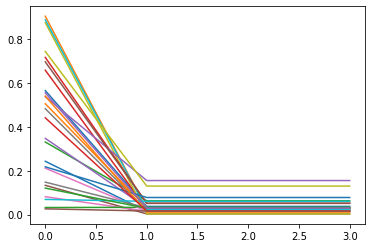

In [12]:
import time 
from IPython.display import clear_output
topologia = [784, 120, 60, 30, 26]
red = crear_red(topologia, activation)
loss = []

for i in range(100):
  pY = train(red, X, Y, coste, learning_rate=0.05)
  if i % 25 == 0:
    costo = coste(pY, Y)[0]
    print(f'Coste iteración {i}: {costo}')
    loss.append(costo)
    

    
plt.plot(range(len(loss)), loss)
plt.show()

# **Coste de entrenamiento**
Como se puede observar en el gráfico el coste se reduce. Cabe destacar que cada letra (A-Z) se representa con un color.